In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  

In [2]:
### T G C R

In [2]:
TTable=pd.read_excel('China2020_2021\TTable.xlsx')

In [3]:
TTable_T=TTable.T

In [4]:
TTable_T

0      1       2        3
2021-04-01  1030.5  222.1  3684.7  33152.6
2021-03-01  1129.5  259.2  3929.9  35484.1
2021-02-01  1526.6  289.1  4871.1  40566.0
2021-01-01  1497.5  257.6  4016.8  39514.2
2020-12-01  1274.0  222.3  3708.5  38576.5
2020-11-01  1124.8  222.0  3866.2  35294.7
2020-10-01   967.2  234.8  3412.8  33570.6
2020-09-01   889.3  178.8  3308.3  32202.5
2020-08-01  1059.3  193.4  3612.2  33525.9
2020-07-01  1017.8  203.1  3376.1  31972.8
2020-06-01   798.7  154.7  3082.7  28177.8
2020-05-01   689.0  147.2  2609.0  26449.9
2020-04-01  1490.5  267.9  4428.1  38776.7
2020-03-01  1427.0  212.0  3465.1  38093.8
2020-02-01  1153.2  198.6  3228.1  38104.3
2020-01-01  1058.4  204.7  3397.5  34494.9
2019-12-01   946.0  212.4  3051.7  33896.3
2019-11-01   934.1  174.9  3056.2  33073.3
2019-10-01  1091.4  217.9  3668.8  33878.1

In [6]:
TTable_T=TTable_T.rename(columns={0:'T',1:'G',2:'C',3:'R'})

In [7]:
from sklearn.tree import DecisionTreeRegressor 


In [8]:
array = TTable_T.values

In [9]:
array[5:,0:3]

array([[1124.8,  222. , 3866.2],
       [ 967.2,  234.8, 3412.8],
       [ 889.3,  178.8, 3308.3],
       [1059.3,  193.4, 3612.2],
       [1017.8,  203.1, 3376.1],
       [ 798.7,  154.7, 3082.7],
       [ 689. ,  147.2, 2609. ],
       [1490.5,  267.9, 4428.1],
       [1427. ,  212. , 3465.1],
       [1153.2,  198.6, 3228.1],
       [1058.4,  204.7, 3397.5],
       [ 946. ,  212.4, 3051.7],
       [ 934.1,  174.9, 3056.2],
       [1091.4,  217.9, 3668.8]])

In [8]:
X = array[5:,0:3]
Y = array[5:,3]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [10]:
model = DecisionTreeRegressor(max_leaf_nodes = 20)

In [11]:
rt = model.fit(X_train, Y_train)
rt

DecisionTreeRegressor(max_leaf_nodes=20)

In [12]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

DecisionTreeRegressor(max_leaf_nodes=20)

In [13]:
X_new= array[:5,0:3]
Ypre = model.predict(X_new)
Prediction=pd.DataFrame(Ypre)

In [14]:
Prediction

0
0  33878.1
1  35294.7
2  38776.7
3  38776.7
4  38093.8

In [15]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys


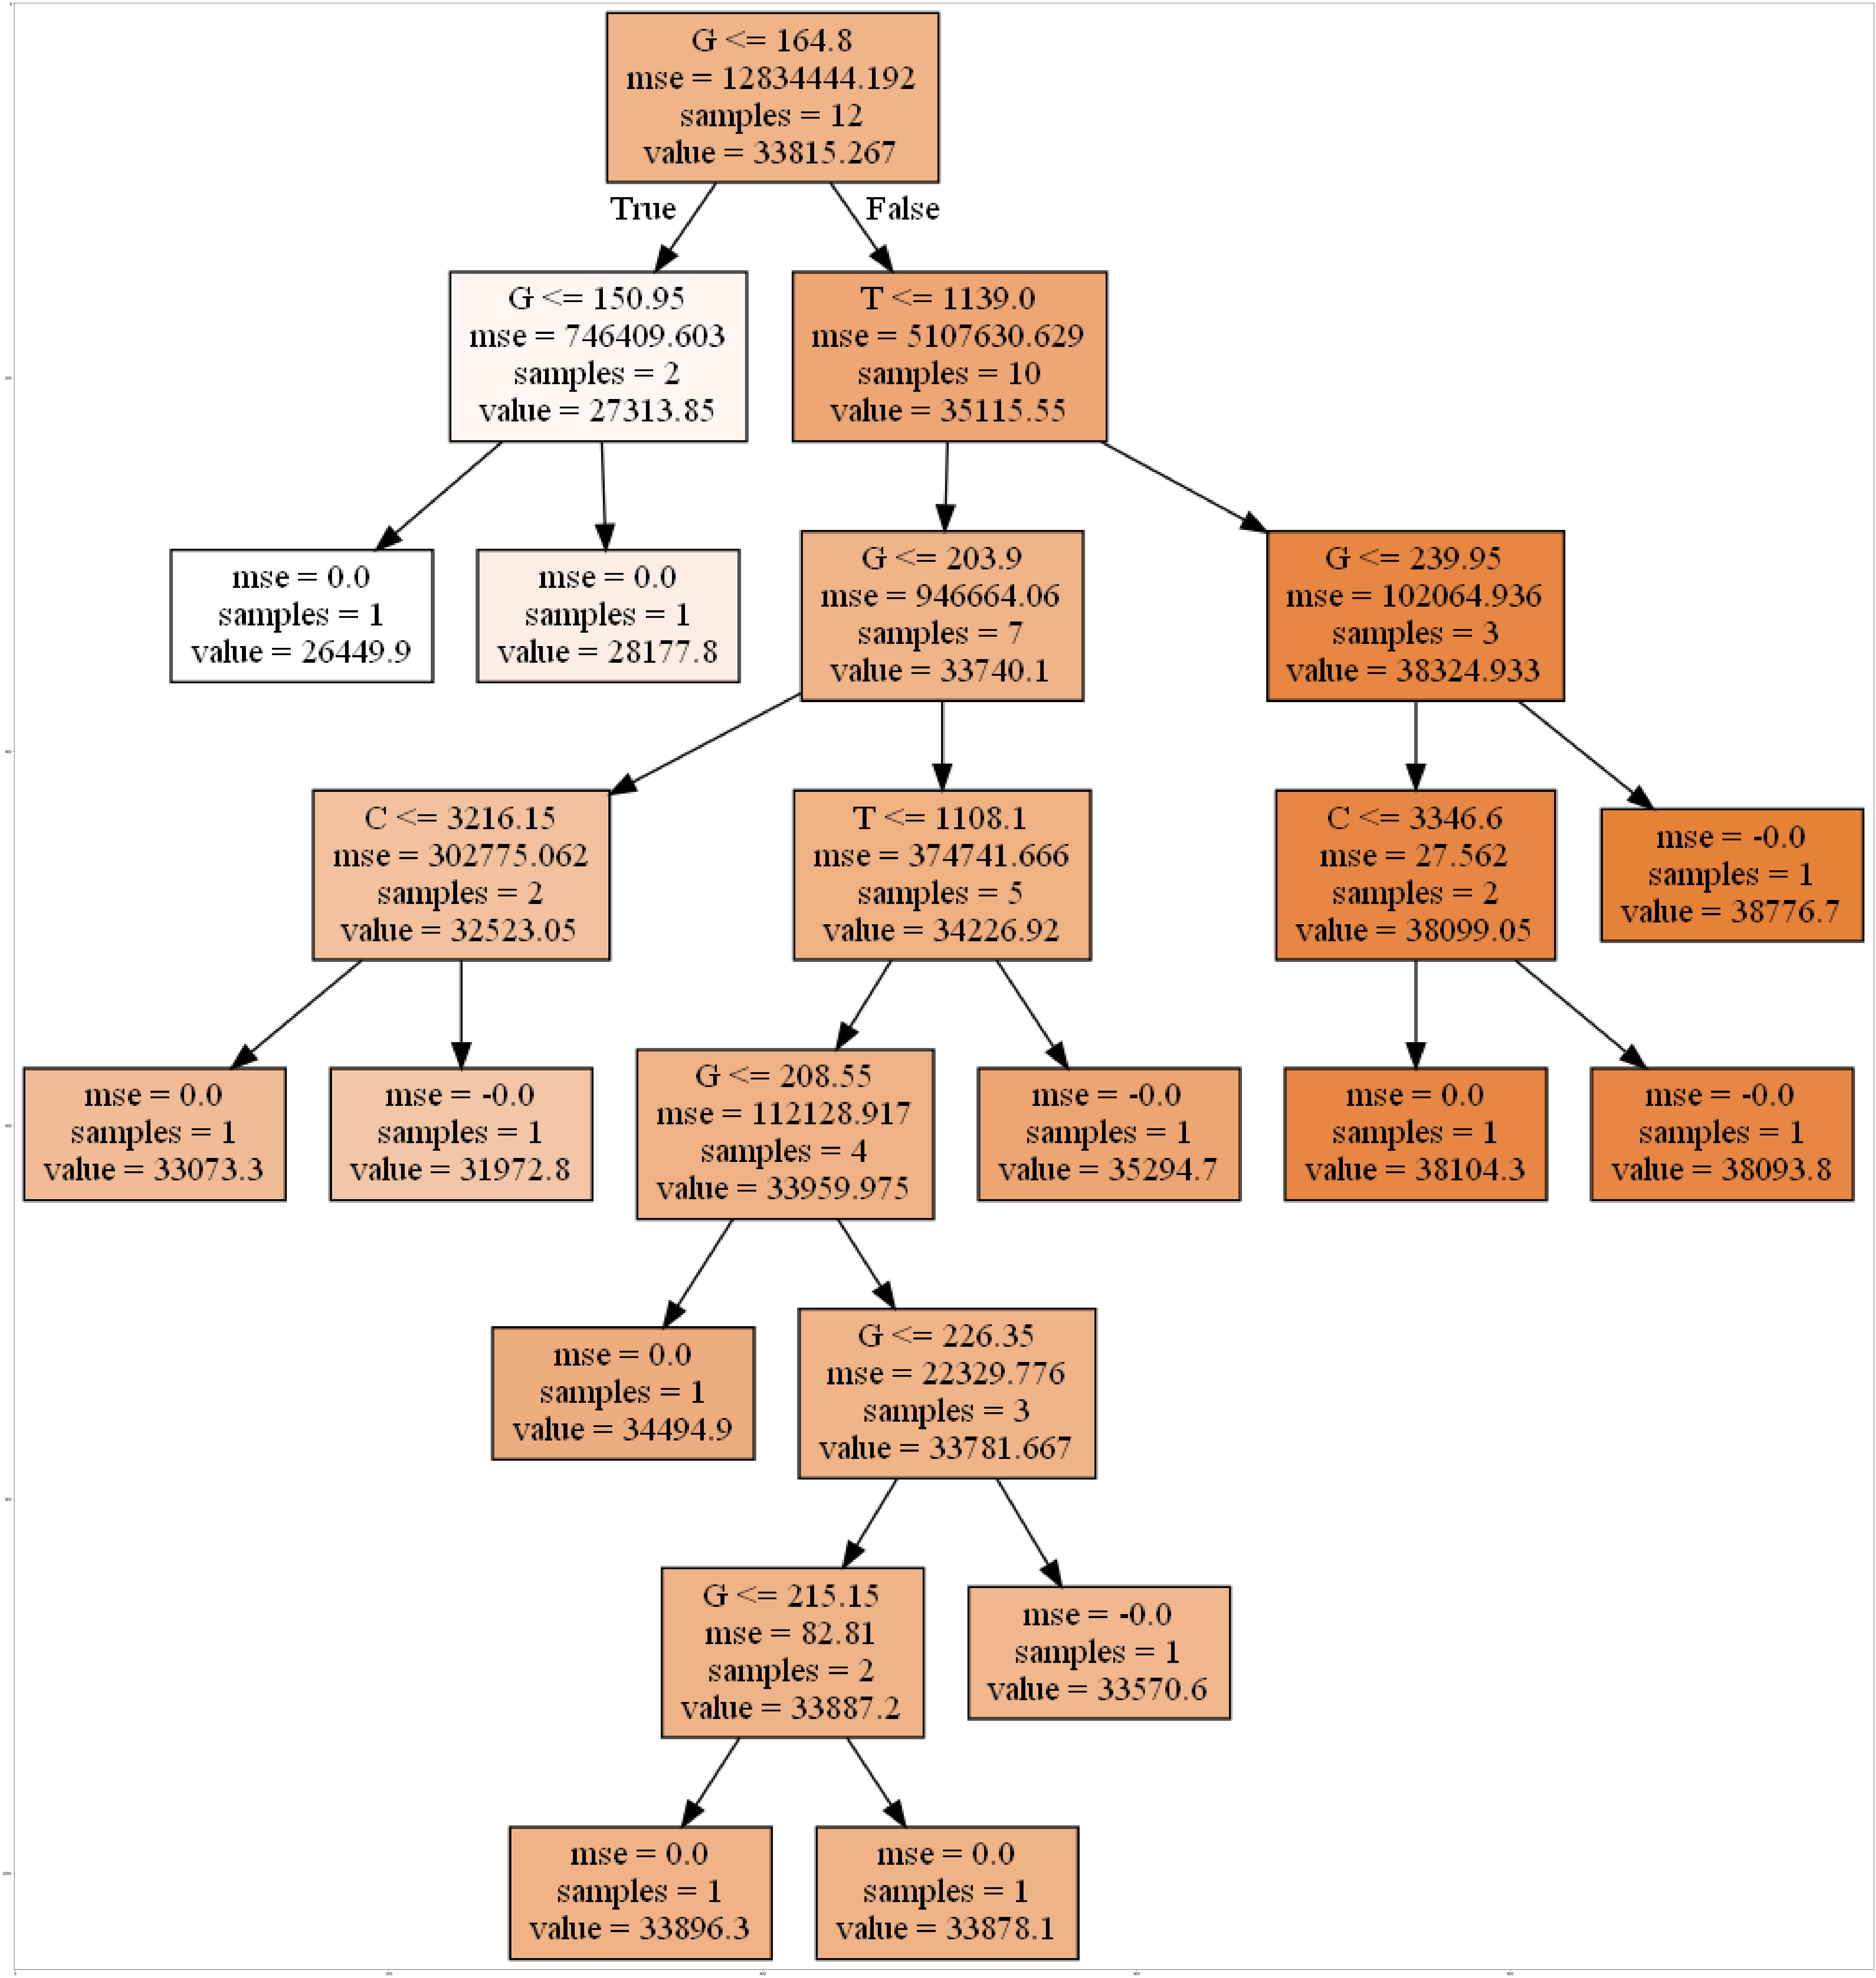

In [16]:
dot_data = io.StringIO()
names=['T','G','C']
tree.export_graphviz(rt, out_file=dot_data, filled=True, feature_names = names, class_names = 'R')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

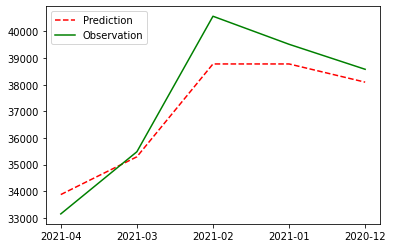

In [40]:
Prediction.values.flatten()
Date=['2021-04', '2021-03',
       '2021-02', '2021-01',
       '2020-12']
YObserv=array[:5,3]

plt.plot(Date,Prediction.values.flatten(),'r--',label="Prediction")
plt.plot(Date,YObserv,'g',label="Observation")
plt.legend()

In [19]:
model.score(X_test,Y_test)

-1.814775845501611

In [20]:
model.score(X_train,Y_train)

1.0

In [21]:
model.score(X_new,Ypre)

1.0

In [22]:
model.criterion

'mse'

In [30]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(YObserv,Ypre))
print('Mean Squared Error:', metrics.mean_squared_error(YObserv,Ypre))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(YObserv,Ypre)))

Mean Absolute Error: 784.8800000000003
Mean Squared Error: 908144.5280000016
Root Mean Squared Error: 952.9661735864509
